In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Exploratory Data Analisys - EDA

In [3]:
df = pd.read_csv("reto_precios.csv")

In [4]:
df.head(2)

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,...,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,...,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963


In [5]:
len(df)

981

#### 1.1 Handling null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   main_name             981 non-null    object 
 1   subtitle              981 non-null    object 
 2   link                  981 non-null    object 
 3   location              981 non-null    object 
 4   price                 981 non-null    object 
 5   attributes            981 non-null    object 
 6   timestamp             981 non-null    object 
 7   id                    981 non-null    int64  
 8   address               702 non-null    object 
 9   since                 981 non-null    object 
 10  description           981 non-null    object 
 11  vendor                981 non-null    object 
 12  lat                   981 non-null    float64
 13  lon                   981 non-null    float64
 14  price_mod             981 non-null    float64
 15  price_currency        9

Los siguientes campos tienen una cantidad de registros nulos muy elevada:
    
    - cellars              -> 929 -> 94.69% de registros nulos
    - num_floors           -> 897 -> 91.43% de registros nulos
    - monthly_fee          -> 853 -> 86.95% de registros nulos
    - apartments_per_floor -> 966 -> 98.47% de registros nulos
    - disposition          -> 961 -> 97.96% de registros nulos
    - floor_situated       -> 957 -> 97.55% de registros nulos
    - orientation          -> 973 -> 99.18% de registros nulos
    - department_type      -> 942 -> 96.02% de registros nulos

Para el prersente análisis se procederá a descartarlos, pero sería interesante estudiarlos (en otro análisis) ya que podrían representar algún tipo de tendencia.

In [7]:
fields = ['main_name', 'subtitle', 'link', 'location', 'price', 'attributes',
       'timestamp', 'id', 'address', 'since', 'description', 'vendor', 'lat',
       'lon', 'price_mod', 'price_currency', 'since_period', 'since_value',
       'days_on_site', 'amenities', 'age_in_years', 'bathrooms', 'parking_lots',
       'num_bedrooms', 'm2', 'final_price', 'price_square_meter']

In [8]:
df = df[fields]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   main_name           981 non-null    object 
 1   subtitle            981 non-null    object 
 2   link                981 non-null    object 
 3   location            981 non-null    object 
 4   price               981 non-null    object 
 5   attributes          981 non-null    object 
 6   timestamp           981 non-null    object 
 7   id                  981 non-null    int64  
 8   address             702 non-null    object 
 9   since               981 non-null    object 
 10  description         981 non-null    object 
 11  vendor              981 non-null    object 
 12  lat                 981 non-null    float64
 13  lon                 981 non-null    float64
 14  price_mod           981 non-null    float64
 15  price_currency      981 non-null    object 
 16  since_pe

Aún nos quedan dos campos con registros nulos, ellos son:

    - address ->   279 -> 28.44% de registros nulos
    - amenities -> 477 -> 48.62% de registros nulos
    
- Para el campo de address, se asignará el valor de espacio en blanco para reemplazar los valores nulos.
- Para el campo de amenities, se asignara el valor mas común de esa columna para reemplazar los valores nulos.

In [10]:
df['address'] = df['address'].fillna(" ")

In [11]:
df['amenities'] = df['amenities'].fillna(df['amenities'].mode().iloc[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   main_name           981 non-null    object 
 1   subtitle            981 non-null    object 
 2   link                981 non-null    object 
 3   location            981 non-null    object 
 4   price               981 non-null    object 
 5   attributes          981 non-null    object 
 6   timestamp           981 non-null    object 
 7   id                  981 non-null    int64  
 8   address             981 non-null    object 
 9   since               981 non-null    object 
 10  description         981 non-null    object 
 11  vendor              981 non-null    object 
 12  lat                 981 non-null    float64
 13  lon                 981 non-null    float64
 14  price_mod           981 non-null    float64
 15  price_currency      981 non-null    object 
 16  since_pe

Ya no tenemos registros con valores nulos

#### Ahora vemos las estadísticas de nuestros datos

In [13]:
df.describe()

,id,lat,lon,price_mod,since_value,days_on_site,amenities,age_in_years,bathrooms,parking_lots,num_bedrooms,m2,final_price,price_square_meter
count,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,981.000000,981.0,981.000000,981.000000,981.000000,981.000000,9.810000e+02,981.000000
mean,494.465851,19.654796,-99.222834,6.144620e+06,15.589195,103.478084,4.041794,0.0,1.970438,1.331295,2.103976,111.824608,6.144620e+06,61048.999248
std,284.137165,1.244009,0.608650,2.907089e+06,16.551510,116.789698,0.906488,0.0,0.887638,0.481631,0.627104,231.604294,2.907089e+06,19327.439701
min,1.000000,19.360533,-117.063962,6.342170e+05,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,31.000000,6.342170e+05,582.246879
25%,250.000000,19.405824,-99.165172,4.330000e+06,3.000000,31.000000,4.000000,0.0,2.000000,1.000000,2.000000,75.000000,4.330000e+06,52294.117647
50%,495.000000,19.411515,-99.163637,5.511689e+06,7.000000,59.000000,4.000000,0.0,2.000000,1.000000,2.000000,93.000000,5.511689e+06,61271.466667
75%,740.000000,19.419526,-99.161332,7.700000e+06,31.000000,120.000000,4.000000,0.0,2.000000,2.000000,2.000000,129.000000,7.700000e+06,70175.438596
max,985.000000,32.528726,-99.128642,2.233000e+07,59.000000,730.000000,8.000000,0.0,23.000000,3.000000,4.000000,7210.000000,2.233000e+07,150514.818182


Rápidamente nos damos cuenta que el campo "age_in_years" contiene un único valor: 0, de manera que procederemos a excluirlo de nuestro análisis ya que no nos aportará nada.

De igual manera, observamos como las columnas de "final_price" y "price_mod" contienen los mismos valores, vamos a comprobarlo

In [14]:
df[df['final_price'] != df['price_mod']].count()[0]

0

Exactamente, todos los valores de "final_price" y "price_mod" son identicos, eliminaremos entonces "price_mod" de nuestro análisis ya que no nos aportará nada.

Tenemos algunos campos que no serán relevantes para nuestro análisis y por consiguiente los eliminaremos, estos son:

    - main_name
    - subtitle
    - link
    - location (este campo se podría considerar en un análisis futuro que involucre técnicas de NLP)
    - price (este ya se encuentra en la columna "final_price")
    - attributes (este ya se encuentra en "m2")
    - timestamp
    - id
    - address (este campo se podría considerar en un análisis futuro que involucre técnicas de NLP)
    - since
    - description (este campo se podría considerar en un análisis futuro que involucre técnicas de NLP)
    - vendor
    - lat
    - lon
    - price_currency
    - since_period

Y nos quedaremos con:

    - lat                 981 non-null    float64
    - lon                 981 non-null    float64
    - price_mod           981 non-null    float64
    - since_value         981 non-null    int64  
    - days_on_site        981 non-null    float64
    - amenities           981 non-null    float64
    - age_in_years        981 non-null    float64
    - bathrooms           981 non-null    float64
    - parking_lots        981 non-null    int64  
    - num_bedrooms        981 non-null    float64
    - m2                  981 non-null    float64
    - final_price         981 non-null    float64
    - price_square_meter  981 non-null    float64

In [15]:
fields = ['since_value', 'days_on_site', 'amenities', 
          'bathrooms', 'parking_lots', 'num_bedrooms', 'm2', 'final_price', 
          'price_square_meter']

Nuestra variable objetivo (a calcular o target) será "price_square_meter", porque es lo pedido en el reto, nuestra correlación de variables se calculará tomando en cuenta eso.

#### A continuación dividimos nuestro dataset

In [16]:
df = df[fields]
X = df.copy()
y = X.pop("price_square_meter")

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   since_value   981 non-null    int64  
 1   days_on_site  981 non-null    float64
 2   amenities     981 non-null    float64
 3   bathrooms     981 non-null    float64
 4   parking_lots  981 non-null    int64  
 5   num_bedrooms  981 non-null    float64
 6   m2            981 non-null    float64
 7   final_price   981 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 61.4 KB


#### 1.2 Distribución de los datos

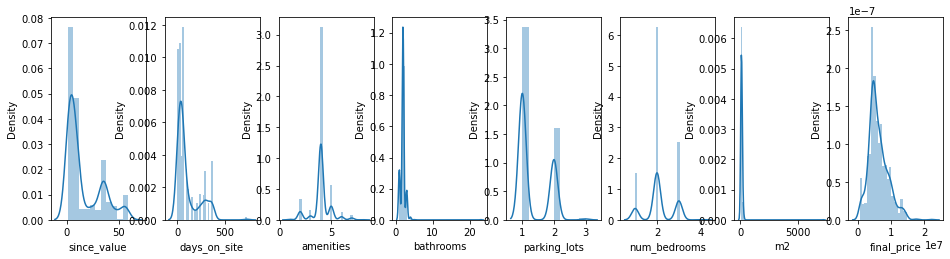

In [18]:
l = list(X.columns)
number_of_columns=len(X.columns.values)
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(X[l[i]], kde=True) 

Nuestra distribuciones muetran que son bastante parecidas a la Distribución Uniforme (si cambiaramos la escala lo veríamos mejor), si decidieramos hacer machine learning, se esperaría que los métodos estadísticos dieran buenos resultados.

#### 1.3 Manejando los Outliers

Analizaremos los Outliers de algunos de los campos

In [19]:
# Función para detectar outliers
def find_anomalies(data):

    anomalies = []
    no_anomalies = []

    # Nuestro límite será 2 desviaciones estándar
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(f"Lower limit: {lower_limit.iloc[0]}")
    print(f"Upper limit: {upper_limit.iloc[0]}")

    # Generamos los outliers
    for index, row in data.iterrows():
        outlier = row # Obtenemos la primera columna
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append((index, outlier))
        else:
            no_anomalies.append((index, outlier))
    return ((anomalies, no_anomalies))

Outliers en "days_on_site"

In [20]:
anomalies_days_on_site, no_anomalies_days_on_site = find_anomalies(X.set_index('since_value')[['days_on_site']])
print(f"Number of records with anomalies: {len(anomalies_days_on_site)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_days_on_site)}")

Lower limit: -130.10131145986512
Upper limit: 337.0574786362158
Number of records with anomalies: 66
Number of records with NO anomalies: 915


Outliers en "amenities"

In [21]:
anomalies_amenities, no_anomalies_amenities = find_anomalies(X.set_index('since_value')[['amenities']])
print(f"Number of records with anomalies: {len(anomalies_amenities)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_amenities)}")

Lower limit: 2.228817684512345
Upper limit: 5.85477049081895
Number of records with anomalies: 128
Number of records with NO anomalies: 853


Outliers en "bathrooms"

In [22]:
anomalies_bathrooms, no_anomalies_bathrooms = find_anomalies(X.set_index('since_value')[['bathrooms']])
print(f"Number of records with anomalies: {len(anomalies_bathrooms)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_bathrooms)}")

Lower limit: 0.19516288364807832
Upper limit: 3.7457137728249084
Number of records with anomalies: 12
Number of records with NO anomalies: 969


Outliers en "parking_lots"

In [23]:
anomalies_parking_lots, no_anomalies_parking_lots = find_anomalies(X.set_index('since_value')[['parking_lots']])
print(f"Number of records with anomalies: {len(anomalies_parking_lots)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_parking_lots)}")

Lower limit: 0.3680321649254005
Upper limit: 2.294557029773886
Number of records with anomalies: 5
Number of records with NO anomalies: 976


Outliers en "num_bedrooms"

In [24]:
anomalies_num_bedrooms, no_anomalies_num_bedrooms = find_anomalies(X.set_index('since_value')[['num_bedrooms']])
print(f"Number of records with anomalies: {len(anomalies_num_bedrooms)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_num_bedrooms)}")

Lower limit: 0.8497671167675245
Upper limit: 3.358183953568867
Number of records with anomalies: 3
Number of records with NO anomalies: 978


Outliers en "m2"

In [25]:
anomalies_m2, no_anomalies_m2 = find_anomalies(X.set_index('since_value')[['m2']])
print(f"Number of records with anomalies: {len(anomalies_m2)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_m2)}")

Lower limit: -351.383980442227
Upper limit: 575.0331955288733
Number of records with anomalies: 1
Number of records with NO anomalies: 980


Outliers en "final_price"

In [26]:
anomalies_final_price, no_anomalies_final_price = find_anomalies(X.set_index('since_value')[['final_price']])
print(f"Number of records with anomalies: {len(anomalies_final_price)}")
print(f"Number of records with NO anomalies: {len(no_anomalies_final_price)}")

Lower limit: 330442.2702482743
Upper limit: 11958797.485103406
Number of records with anomalies: 45
Number of records with NO anomalies: 936


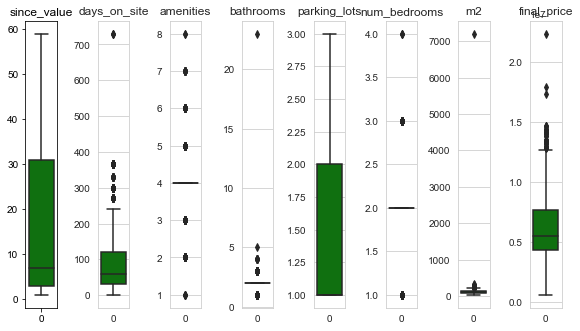

In [27]:
l = list(X.columns)
number_of_columns=len(X.columns.values)
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data=X[l[i]], color='green', orient='v').set(title=l[i])
    plt.tight_layout()

#### NOTA:
Tenemos valores atípicos en todos los campos, solo los reportaré, no los eliminaré y no les daré un tratamiento especial (como asignarles la media o la moda) porque No sé si estos valores se pueden tomar como normales o si realmente son valores atípicos ya que no conozco a profundidad las políticas que se deben llevar a cabo con estos valores en este ejercicio.

#### 1.3 Normalización

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
features = list(X.columns)
X[features] = min_max_scaler.fit_transform(X[features])

In [29]:
X.head(2)

,since_value,days_on_site,amenities,bathrooms,parking_lots,num_bedrooms,m2,final_price
0,0.068966,0.005487,0.285714,0.045455,0.5,0.333333,0.013372,0.385595
1,0.103448,0.008230,0.142857,0.000000,0.0,0.000000,0.003204,0.167304


Tenemos las variables numéricas normalizadas

#### 1.5 Correlación

In [30]:
df_corr = pd.concat([X, y], axis = 1)

<AxesSubplot:title={'center':'Pearson correlation'}>

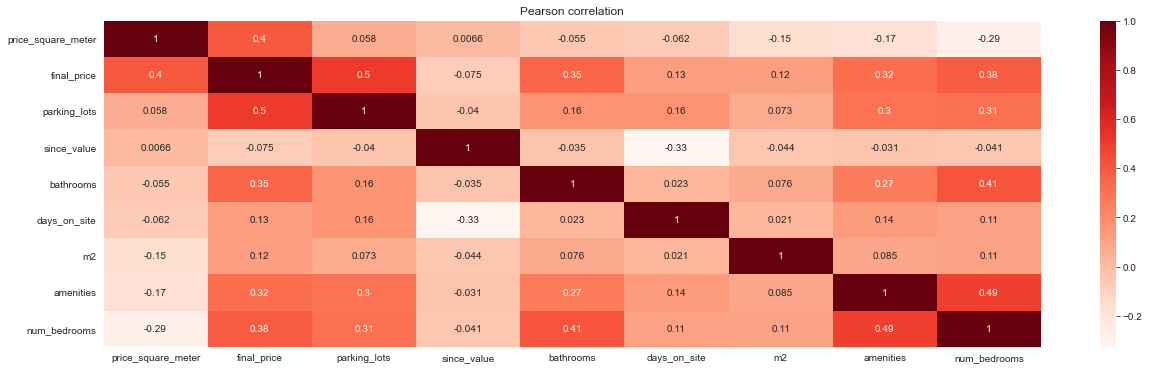

In [31]:
k = len(df_corr.columns) # Número de variables para el heatmap
cols = df_corr.corr().nlargest(k, 'price_square_meter')['price_square_meter'].index
cm = df_corr[cols].corr()
plt.figure(figsize=(21,6))
plt.title("Pearson correlation")
sns.heatmap(cm, annot=True, cmap = 'Reds')

Según la bibliografía que investigué, los factores que influyen en el precio de una vivienda viene dado por:

    - Factores Externos:
        - Zona de la ciudad
        - Servicios próximos
        - Situación del mercado
    - Factores Internos:
        - Estado del inmueble y metros disponibles
        - Número de habitaciones y distribución
        - Instalaciones y zona de uso
        
Pero acá hablamos del precio por metro cuadrado.

Podemos apreciar en el HeatMap de correlación como la características que mejor explica el precio por metro cuadrado de cada vivienda es "final_price" (0.4) y es lógico porque el precio por metro cudrado es la resulta de dividir el precio final entre la cantidad de metros cuadrados. 

Además, el número de cuartos (num_bedrooms) también tiene cierta relación inversa (-0.29), el resto de las características no poseen correlación importante con el precio por metro cuadrado (price_square_meter).

Esto al menos sucede con este dataset.

#### 1.6 Mejores características con el método "SelectKBest", otro punto de vista.

Para crear una instancia de SelectKBest es necesario indicar la métrica que se desea emplear para el problema y el número de características finales. Como métrica, generalmente se usa la función f_regression en los problemas de regresión y chi2 en los de clasificación

In [32]:
# Aplicamos SelectKBest para extraer las mejores características
bestfeatures = SelectKBest(score_func=f_regression, k='all')

seleccion = list(X.columns)
fit = bestfeatures.fit(X[seleccion],y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X[features].columns)

# Concatenamos los 2 dataframes para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print("\n       BEST FEATURES")
print("===========================\n")
print(featureScores.nlargest(20,'Score'))  # Desplegamos las mejores características


       BEST FEATURES

          Specs       Score
7   final_price  181.934488
5  num_bedrooms   91.782248
2     amenities   29.060891
6            m2   23.325223
1  days_on_site    3.776674
4  parking_lots    3.282764
3     bathrooms    2.972266
0   since_value    0.042992


Usando el método de regresión se puede apreciar mejor, vemos como el precio final (final_proce) sigue siendo el principal factor para determinar el precio por metro cuadrado, seguido del número de cuartos (num_bedrooms), las comodidades (amenities) y los metros cuadrados (m2).

Lógicamente mientras una vivienda tenga mas cuartos y comodidades se cotizará mejor el precio del metro cuadrado.

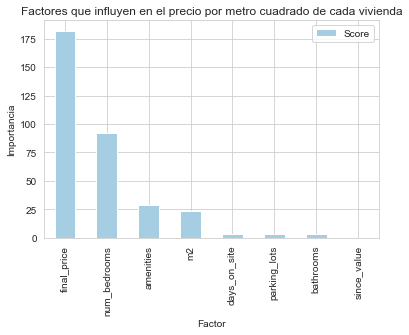

In [55]:
featureScores.sort_values(by='Score', ascending=False).plot(kind="bar", 
                                                            x="Specs", 
                                                            colormap='Paired')
                                                            
plt.title("Factores que influyen en el precio por metro cuadrado de cada vivienda")
plt.xlabel("Factor")
plt.ylabel("Importancia")

plt.show()